# Day 8 作業

## [作業目標]
* 熟悉濾波器的操作

    1. 比較四種低通濾波器的去噪能力及運算時間 (Average, Gaussian, NL, Median)
    2. 比較兩種邊緣偵測演算法的效果及運算時間 (Sobel, Canny)

## [作業重點]
* 熟悉 OpenCV 的 filter2D 函數
* 觀察圖片的變化

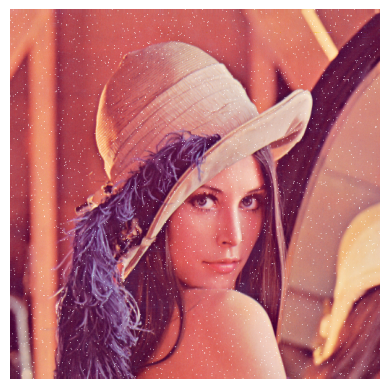

In [3]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

""" Your Code Here: 讀取 lena_noise.png 並使用 matplotlib 顯示 """

img_bgr = cv2.imread ('lena_noise.png')

img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

# 1. 比較四種低通濾波器的去噪能力及運算時間 (Average, Gaussian, NL, Median)
* 因為 Average, Gaussian 都是使用 filter2D 去掃描圖片，故速度差不多
* NL 具較高的時間複雜度，需要較久的時間
* Median 具有最好的去白噪點效果，因為該演算法只會取範圍內的中位數，可以徹底去除極端值

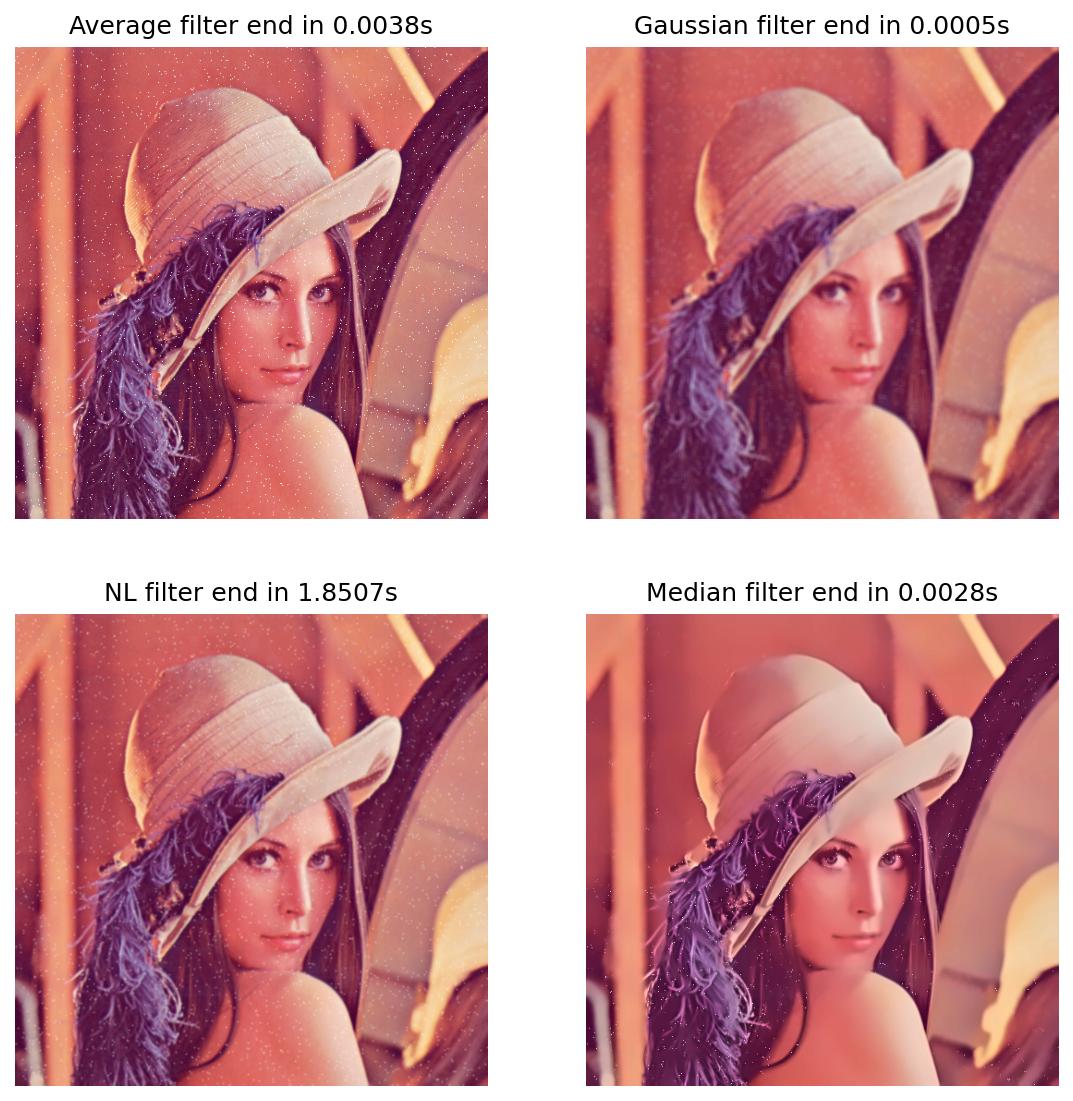

In [5]:
import cv2
import matplotlib.pyplot as plt
import time

# 读取图像
img = cv2.imread('lena_noise.png')

# 定义一个函数来计算执行时间
def apply_filter_and_measure_time(filter_func, *args):
    start_time = time.time()
    result = filter_func(*args)
    end_time = time.time()
    execution_time = end_time - start_time
    return result, execution_time

# 定义滤波器函数
def average_filter(img):
    kernel = np.ones((5, 5), np.float32) / 25
    return cv2.filter2D(img, -1, kernel)

def gaussian_filter(img):
    return cv2.GaussianBlur(img, (3, 3), 0)

def nl_filter(img):
    return cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

def median_filter(img):
    return cv2.medianBlur(img, 5)

# 应用滤波器并记录时间
noisy_img = img
average_filtered_img, avg_time = apply_filter_and_measure_time(average_filter, noisy_img)
gaussian_filtered_img, gauss_time = apply_filter_and_measure_time(gaussian_filter, noisy_img)
nl_filtered_img, nl_time = apply_filter_and_measure_time(nl_filter, noisy_img)
median_filtered_img, median_time = apply_filter_and_measure_time(median_filter, noisy_img)

# 图像列表
images = [noisy_img, average_filtered_img, gaussian_filtered_img, nl_filtered_img, median_filtered_img]

# 标题列表，包含运算时间
show_name = [
    f'Average filter end in {avg_time:.4f}s',
    f'Gaussian filter end in {gauss_time:.4f}s',
    f'NL filter end in {nl_time:.4f}s',
    f'Median filter end in {median_time:.4f}s'
]

# 显示原图像和滤波后的图像
plt.figure(figsize = (9, 9), dpi = 150)

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(show_name[i])
    plt.axis('off')

plt.show()


# 2. 比較兩種邊緣偵測演算法的效果及運算時間 (Sobel, Canny)

In [8]:
img = cv2.imread ('paper.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def apply_filter_and_measure_time(filter_func, *args):
    start_time = time.time()
    result = filter_func(*args)
    end_time = time.time()
    execution_time = end_time - start_time
    return result, execution_time

def sobel(gray):
    sobel_x = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ])

    Gx = cv2.filter2D(gray, -1, sobel_x)

    sobel_y = np.array([
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ])

    Gy = cv2.filter2D(gray, -1, sobel_y)

    Gx = cv2.convertScaleAbs(Gx)
    Gy = cv2.convertScaleAbs(Gy)

    return cv2.addWeighted(Gx, 0.5, Gy, 0.5, 0)

def canny(gray):
    return cv2.Canny(gray, 50, 150)

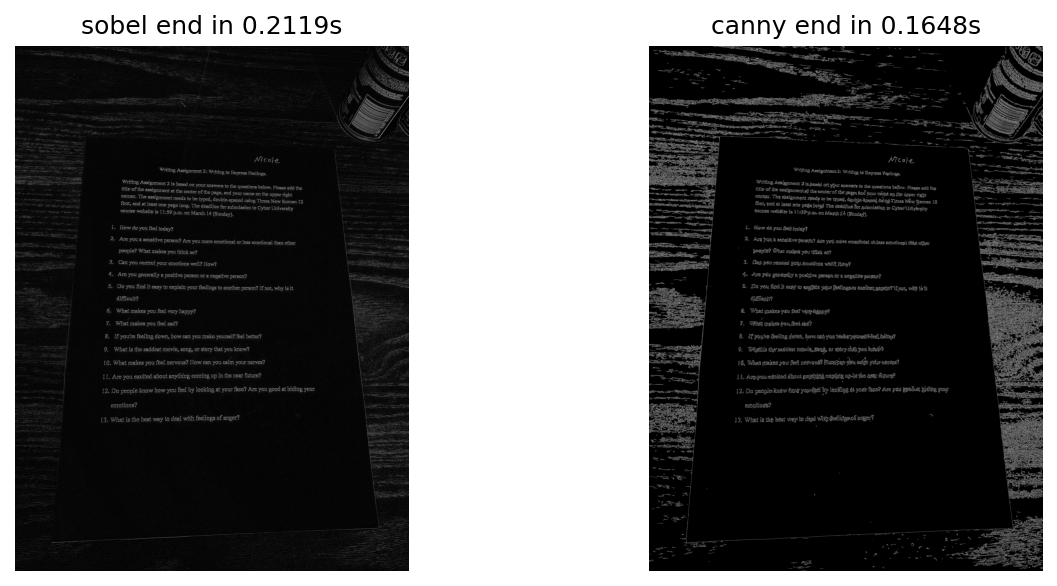

In [12]:
""" Your Code Here: 讀取 ./data/paper.jpg 進行實作 """

""" Your Code Here: 分別比較四個演算法的運算時間及畫出處理後的圖片 """

sobel_img, sobel_time = apply_filter_and_measure_time(sobel, gray)
canny_img, canny_time = apply_filter_and_measure_time(canny, gray)

images = [sobel_img, canny_img]

show_name = [
    f'sobel end in {sobel_time:.4f}s',
    f'canny end in {canny_time:.4f}s',
]

plt.figure(figsize = (10, 10), dpi = 150)

for i in range(2):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(show_name[i])
    plt.axis('off')

plt.show()